In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, mean_squared_error, f1_score, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



Installing and calling the necessary libraries. 

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

Importing the training and testing data. 

In [3]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking for missing values.

In [4]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


The summary statistics of the training dataset shows that the features: HasCrCard, IsActiveMember and Exited are all binary.

In [5]:
Y = ["Exited"]
X = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
x_train, x_test, y_train, y_test = train_test_split(df_train[X], df_train[Y], test_size = 0.2, random_state = 7)

Spliting the training set into a seperate testing and training set in order to evaluate the model. 
The training data was split into 20-80.

Since our outcome is binary, ML methods such as Decision Trees, Random Forest, Boosted Tree and Logistic Regression would be suitible for building the model. 

In [6]:
# Logistic Regression
log = LogisticRegression()

log.fit(x_train, np.ravel(y_train))
preds_log = log.predict(x_test)

C:\Users\Computer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
log_mse = mean_squared_error(y_test, preds_log)
log_mse

0.211621777198776

However, from the summary statistics, we see that features such as CreditScore, Age, Balance, and EstimatedSalary have very wide ranges. 

Thus, the performance would improve if we scale these features such that their values become more uniform. 

In [8]:
# Feature Scaling
scale = StandardScaler()

x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [9]:
# Logistic Regression on Scaled Features

log.fit(x_train_scale, np.ravel(y_train)) 
preds_log_scale = log.predict(x_test_scale)

In [10]:
# MSE of Scaled Logistic Regression
log_scale_mse = mean_squared_error(y_test, preds_log_scale)
log_scale_mse

0.1767200896779471

In [11]:
# Decision Tree
dc_tree = DecisionTreeClassifier(random_state = 7)

dc_tree.fit(x_train, y_train)
preds_dc_tree = dc_tree.predict(x_test)


In [12]:
# MSE of Decision Tree Model
dc_tree_mse = mean_squared_error(y_test, preds_dc_tree)
dc_tree_mse

0.21862029266519223

In [13]:
# Random Forest
rf = RandomForestClassifier(random_state = 7)

rf = rf.fit(x_train, np.ravel(y_train))
preds_rf = rf.predict(x_test)


In [14]:
rf_mse = mean_squared_error(y_test, preds_rf)
rf_mse

0.15118005271609053

In [15]:
# Boosted Tree
xgb_tree = xgb.XGBClassifier(objective = "binary:logistic")

xgb_tree.fit(x_train, y_train)
xgb_tree_preds = xgb_tree.predict(x_test)

In [16]:
# MSE of Boosted Tree
xgb_tree_mse = mean_squared_error(y_test, xgb_tree_preds)
xgb_tree_mse

0.14572666404096102

From the MSEs, we see that XGBoost and Random Forest Classifiers produces the best results with MSEs of 0.1457 and 0.1512 respectively. 

In [17]:
accuracy_score(y_test, preds_rf)

0.8488199472839095

In [18]:
accuracy_score(y_test, xgb_tree_preds)

0.854273335959039

In [19]:
print(classification_report(y_test, preds_rf))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     26049
           1       0.70      0.49      0.58      6958

    accuracy                           0.85     33007
   macro avg       0.79      0.72      0.74     33007
weighted avg       0.84      0.85      0.84     33007



In [20]:
print(classification_report(y_test, xgb_tree_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26049
           1       0.72      0.51      0.60      6958

    accuracy                           0.85     33007
   macro avg       0.80      0.73      0.75     33007
weighted avg       0.84      0.85      0.84     33007



In [21]:
con_m_xgb = confusion_matrix(y_test, xgb_tree_preds)

In [22]:
con_m_rf = confusion_matrix(y_test, preds_rf)

In [23]:
disp = ConfusionMatrixDisplay(con_m_xgb, display_labels=None)

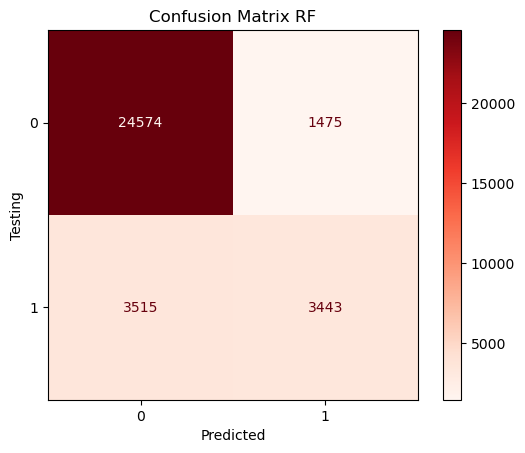

In [24]:
disp = ConfusionMatrixDisplay(con_m_rf, display_labels=None)

disp.plot(cmap="Reds")

plt.title("Confusion Matrix RF")
plt.xlabel("Predicted")
plt.ylabel("Testing")
plt.show()

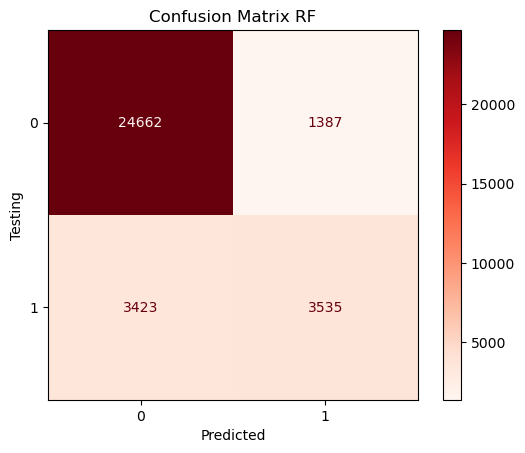

In [25]:
disp = ConfusionMatrixDisplay(con_m_xgb, display_labels=None)

disp.plot(cmap="Reds")

plt.title("Confusion Matrix RF")
plt.xlabel("Predicted")
plt.ylabel("Testing")
plt.show()

In [26]:
f1_score(y_test, preds_rf)

0.5798248568541596

In [27]:
f1_score(y_test, xgb_tree_preds)

0.5951178451178452

From the accuracy scores of 0.8488 and 0.8543, we can see that XGBoost predicted more accurately compared to Random Forest. Even though it was only be a small margin. The confusion matrix further examplifies this claim, where we can see that the True negatives of the XGBoost model is relatively smaller. One similar flaw of both models is the high False Negative rates. This problem can be fixed by tuning the parameters of each model. Similarily, in terms of the f1 scores of 0.5798 and 0.5951, we can see that XGBoost did relatively better than the Random Forest Classifier. Although a score of 0.5951 is still far from ideal, and can most likely improve with some tuning of parameters, due to the class imbalance of the dataset, tuning would most likely still be limited in its ability to improve the score. Due to time constraints, I did not have the opportunity to attempt to tune the models.



In [28]:
# Predict test.csv

x_test_actual = df_test[X]

result = xgb_tree.predict(x_test_actual)
results_df = pd.DataFrame({"id": df_test["id"], "CustomerId": df_test["CustomerId"], "Exited": result})

In [29]:
results_df.to_csv("Test_Exit.csv", index=False)